In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
tf.reset_default_graph()
import pylab 

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("train_images : ", train_images.shape)
print("test_images : ", test_images.shape)
print("train_labels: ", train_labels.shape)
print("test_labels: ", test_labels.shape)

train_images :  (60000, 28, 28)
test_images :  (10000, 28, 28)
train_labels:  (60000,)
test_labels:  (10000,)


In [2]:
# Extract only 3 and 8 from train dataset
train_labels_new = train_labels[(train_labels == 3) | (train_labels == 8)]
train_images_new = train_images[(train_labels == 3) | (train_labels == 8)]

# Extract only 3 and 8 from test dataset
test_labels_new = test_labels[(test_labels == 3) | (test_labels == 8)]
test_images_new = test_images[(test_labels == 3) | (test_labels == 8)]


# Reshape training dataset so that the features are flattened
train_images_new = train_images_new.reshape(train_images_new.shape[0], -1).astype('float32')
test_images_new = test_images_new.reshape(test_images_new.shape[0], -1).astype('float32')

#Normalized the data
train_images_new = train_images_new / 255.0
test_images_new = test_images_new / 255.0
#np.savetxt("foo.csv", train_labels_new, delimiter=",")
print("New dimension after extracting...")
print("---------------------------------")
print('train_images_new', train_images_new.shape)
print('train_labels_new', train_labels_new.shape)
print('test_images_new: ', test_images_new.shape)
print('test_labels_new: ', test_labels_new.shape)

# encoding 3=0 and 8=1
test_labels_new[test_labels_new == 3] = 0
test_labels_new[test_labels_new == 8] = 1

train_labels_new[train_labels_new == 3] = 0
train_labels_new[train_labels_new == 8] = 1
#print(train_labels_new)
#print(test_labels_new)

#Reshape the label dataset
test_labels_new = test_labels_new.reshape(1,-1)
train_labels_new = train_labels_new.reshape(1,-1)

#Transpose the train and test data
train_images_new = train_images_new.T
test_images_new = test_images_new.T
print("---------------------------------")
print("New dimension to feed into the network...")
print("---------------------------------")
print("train_images_transpose: ", train_images_new.shape)
print("test_images_transpose: ", test_images_new.shape)
print('train_labels_new', train_labels_new.shape)
print('test_labels_new', test_labels_new.shape)

New dimension after extracting...
---------------------------------
train_images_new (12000, 784)
train_labels_new (12000,)
test_images_new:  (2000, 784)
test_labels_new:  (2000,)
---------------------------------
New dimension to feed into the network...
---------------------------------
train_images_transpose:  (784, 12000)
test_images_transpose:  (784, 2000)
train_labels_new (1, 12000)
test_labels_new (1, 2000)


In [7]:
train_images_new.shape[0]

784

In [4]:
#print(train_images_new.shape[0])
learningRate = 0.01
# Define the placeholders to load our training and target labels.
x = tf.placeholder(tf.float32, [train_images_new.shape[0], None])
y_ = tf.placeholder(tf.float32, [1, None])

In [26]:
# define our weight and bias matrix
w = tf.Variable(tf.random_normal([train_images_new.shape[0],100], mean=0.0, stddev=0.8))
w_T = tf.transpose(w)
b = tf.Variable([0.])

#Multiply weight and bias matrix
y_pred_1 = tf.matmul(w_T, x) + b
#pipe it through relu activation function
layer1 = tf.nn.relu(y_pred_1)

# define our weight and bias matrix
w1 = tf.Variable(tf.random_normal([100,1], mean=0.0, stddev=0.04))
w1_T = tf.transpose(w1)
b1 = tf.Variable([0.])
#Multiply weight and bias matrix
y_pred_2 = tf.matmul(w1_T, layer1) + b1
#pipe it through sigmoid activation function
y_pred_sigmoid = tf.sigmoid(y_pred_2)

In [27]:
# Get cross entropy error for all our training dataset
x_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred_2, labels=y_)
# Get the mean cross entropy error
loss = tf.reduce_mean(x_entropy)
# Apply Gradient Descent to minimize the error.
optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)
# Round off the predictions (0 or 1)
predictions = tf.round(y_pred_sigmoid)
predictions_correct = tf.cast(tf.equal(predictions, y_), tf.float32)
# Get the mean accuracy 
accuracy = tf.reduce_mean(predictions_correct)

Epoch  0  Train Loss:  2.5025325   Train Acc:  0.48775
Epoch  1  Train Loss:  5.4029884   Train Acc:  0.5
Epoch  2  Train Loss:  0.88996416   Train Acc:  0.56708336
Epoch  3  Train Loss:  2.4023304   Train Acc:  0.5054167
Epoch  4  Train Loss:  0.73112184   Train Acc:  0.68233335
Epoch  5  Train Loss:  0.32374096   Train Acc:  0.9063333
Epoch  6  Train Loss:  0.10383492   Train Acc:  0.9675
Epoch  7  Train Loss:  0.08558708   Train Acc:  0.97391665
Epoch  8  Train Loss:  0.08044445   Train Acc:  0.9740833
Epoch  9  Train Loss:  0.07875932   Train Acc:  0.97466666
Epoch  10  Train Loss:  0.07810574   Train Acc:  0.97508335
Epoch  11  Train Loss:  0.07776249   Train Acc:  0.97533333
Epoch  12  Train Loss:  0.07751292   Train Acc:  0.97541666
Epoch  13  Train Loss:  0.07729311   Train Acc:  0.9755833
Epoch  14  Train Loss:  0.07708451   Train Acc:  0.9755833
Epoch  15  Train Loss:  0.07688166   Train Acc:  0.97566664
Epoch  16  Train Loss:  0.07668293   Train Acc:  0.97575
Epoch  17  Trai

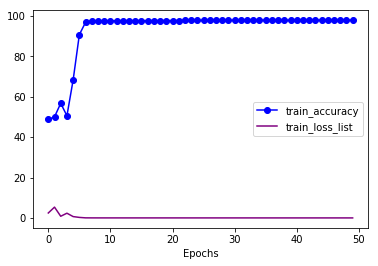

Total time is:  4.47 seconds
Final Test Accuracy  97.6


In [28]:
num_Iterations = 50
# Start the session
with tf.Session() as sess:
        # create lists to plot the graph
        train_loss_list = []
        epoch_list = []
        train_acc_list = []
        start_time = time.time()
        # Initialize all variables
        sess.run(tf.global_variables_initializer())
        
        for i in range(num_Iterations):
            _, train_loss, train_acc  = sess.run([optimizer, loss, accuracy], feed_dict={x:train_images_new, y_:train_labels_new})
            train_loss_list.append(train_loss)
            epoch_list.append(i)
            train_acc_list.append(train_acc*100)

            
            print ("Epoch ", i, " Train Loss: ", train_loss, "  Train Acc: ", train_acc)

        duration = time.time() - start_time

        pylab.plot(epoch_list, train_acc_list, '-ob', label = 'train_accuracy')
        pylab.plot(epoch_list, train_loss_list, 'purple', label = 'train_loss_list')
        pylab.legend(loc='bottom right')
        plt.xlabel('Epochs')
        pylab.show()
        print("Total time is: ", round(duration, 2), "seconds")
        print ("Final Test Accuracy ", sess.run(accuracy*100, feed_dict={x:test_images_new, y_:test_labels_new}))